# Importing the libraries

In [ ]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

We import the necessary libraries: TensorFlow, Keras, NumPy, and Matplotlib. These libraries will be used for building and training the neural network, manipulating the data, and visualizing the results.

# Downloading the dataset and splitting

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


We use the keras.datasets.fashion_mnist module to load the Fashion MNIST dataset. It contains 60,000 grayscale images of 10 different fashion categories for training (x_train) and corresponding labels (y_train), as well as 10,000 test images (x_test) and labels (y_test).

# Normalization

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

To preprocess the data, we normalize the pixel values of the images to be between 0 and 1 by dividing each value by 255. This step is important to ensure that the input data is in a suitable range for training.

# Model Architecture

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

We define the model architecture using the Sequential class from Keras. This model is a stack of layers. The first layer, Flatten, transforms the 2D input image into a 1D array. The next layer is a fully connected (Dense) layer with 128 units and ReLU activation function. Finally, we have another Dense layer with 10 units (equal to the number of classes in the Fashion MNIST dataset) and a softmax activation function to produce the probabilities for each class.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We compile the model by specifying the optimizer, loss function, and evaluation metrics. In this case, we use the Adam optimizer, sparse categorical cross-entropy as the loss function (suitable for multi-class classification), and accuracy as the evaluation metric.

# Model Training

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5045 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3777 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3383 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3147 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2958 - accuracy: 0.8910


We train the model using the fit function. Here, we pass the training data (x_train and y_train) and specify the number of epochs (iterations over the entire dataset) as 5. During training, the model learns to minimize the loss and improve its performance on the training data.

# Testing and Evaluation of the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3810 - accuracy: 0.8626
Test accuracy: 0.8626000285148621


We evaluate the trained model on the test data (x_test and y_test) using the evaluate function. This provides us with the test loss and test accuracy, which we then print.

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


We make predictions on the test data using the predict function. This returns the predicted class probabilities for each test sample.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

We define a list of class names corresponding to the fashion categories in the dataset. This will be used for labeling the predictions.

# Sample Predictions

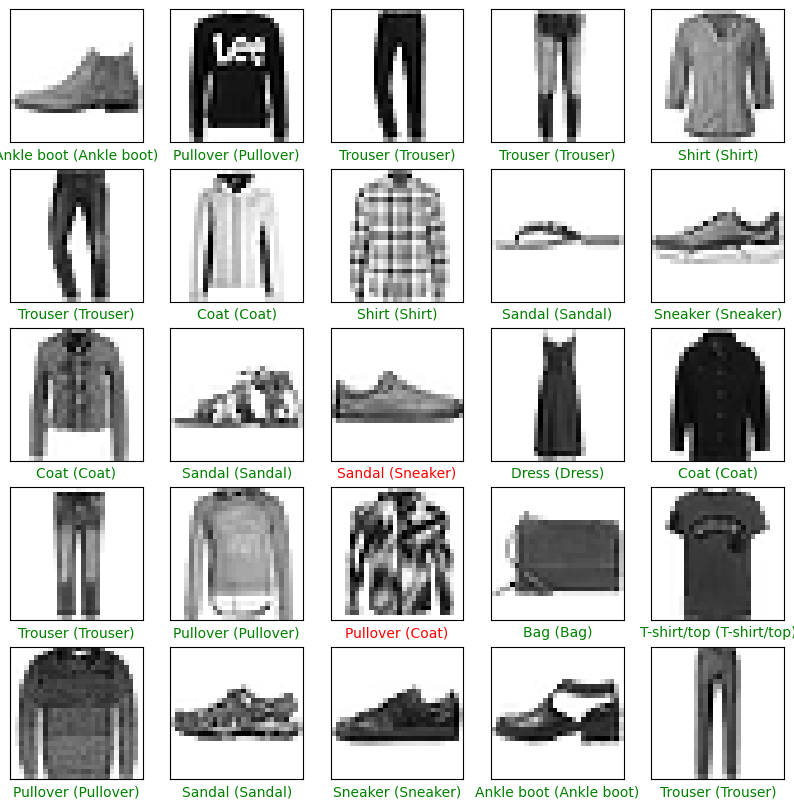

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)
plt.show()

We create a figure with a 5x5 grid of subplots and iterate over the first 25 test samples. For each sample, we plot the corresponding image using imshow. We also display the predicted label and true label as the xlabel. If the predicted label matches the true label, the text color is set to green; otherwise, it is set to red. Finally, we show the figure with the plotted images.

# Model Architecture




The chosen model architecture consists of three main components: a flattening layer, a dense hidden layer, and an output layer. Here's the reasoning behind this architecture:

1. **Flattening Layer:** The Fashion MNIST dataset consists of 28x28 grayscale images. However, most deep learning models, including the one implemented here, expect inputs to be in the form of a 1D array or vector. Therefore, we use the `Flatten` layer as the first layer in the model to reshape the 2D input image into a 1D array of size 784 (28x28). This allows us to maintain the spatial information of the image while preparing it as input for the subsequent layers.

2. **Dense Hidden Layer:** After the flattening layer, we add a dense hidden layer with 128 units and ReLU activation. The purpose of this layer is to learn meaningful representations of the input data through a set of interconnected neurons. The choice of 128 units is somewhat arbitrary and can be adjusted based on the complexity of the problem and the available computational resources. A larger number of units can potentially capture more intricate patterns, but it also increases the computational requirements.

3. **Output Layer:** The output layer is another dense layer with 10 units, corresponding to the 10 fashion categories in the dataset. We use the softmax activation function in this layer to obtain a probability distribution over the classes. The softmax function ensures that the predicted probabilities sum up to 1, allowing us to interpret the output as the model's confidence scores for each class.

The overall architecture follows a feedforward pattern, where information flows from the input layer through the hidden layers to the output layer. The number of layers and the number of units in each layer are design choices that can be adjusted based on the specific problem, dataset, and computational resources.

The chosen architecture is a relatively simple one and serves as a starting point for image classification tasks. More complex architectures, such as convolutional neural networks (CNNs), are often employed for image-related tasks to capture spatial relationships and local patterns more effectively. However, for the Fashion MNIST dataset, which consists of relatively simple images, this simple dense network architecture can achieve reasonable accuracy.

# Optimzer and Loss Function:


**Optimizer:**
The optimizer is responsible for updating the model's weights during training in order to minimize the loss function. In this code, we use the Adam optimizer by specifying `optimizer='adam'` in the `compile` function. Adam stands for Adaptive Moment Estimation and is a popular optimization algorithm that adjusts the learning rate dynamically based on the gradients of the weights.

The choice of optimizer is crucial as it affects how quickly and efficiently the model learns. Different optimizers have different update rules and learning rate schedules. Adam is a commonly used optimizer that performs well in many scenarios. However, depending on the problem and dataset, other optimizers such as Stochastic Gradient Descent (SGD), RMSprop, or AdaGrad may yield better results. It's often a good idea to experiment with different optimizers to find the one that works best for your specific use case.

**Loss Function:**
The loss function is a measure of how well the model's predictions match the true labels during training. It quantifies the discrepancy between the predicted output and the ground truth. In this code, we use the sparse categorical cross-entropy loss function specified as `loss='sparse_categorical_crossentropy'` in the `compile` function.

The choice of loss function depends on the problem type and the nature of the output. Since Fashion MNIST is a multi-class classification problem (assigning an image to one of multiple classes), we use sparse categorical cross-entropy. This loss function is suitable when the labels are provided as integers rather than one-hot encoded vectors. It calculates the cross-entropy loss between the predicted class probabilities and the true class labels.

For different problem types, there are various other loss functions available. For example, for binary classification problems, binary cross-entropy is commonly used, and for regression tasks, mean squared error (MSE) or mean absolute error (MAE) may be appropriate. It's important to choose the correct loss function that aligns with the problem's objective to train the model effectively.

# Conclusion

In summary, the optimizer and loss function work together to update the model's weights based on the computed loss, allowing the model to learn from the training data and improve its performance. The choice of optimizer and loss function can impact the convergence speed and the overall accuracy of the model.